In [2]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import myUtils as ut
import math
import numpy as np
import pandas as pd
import random
import seaborn as sb

from lazypredict.supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

from PyBioMed.Pyprotein import CalculateAAComposition, CalculateDipeptideComposition, CalculateCTD, GetAPseudoAAC

import tensorflow as tf

In [3]:
ut.import_data()

In [47]:
sequences_ne = ut.parse_sequences("nonAMP_sequence\\nonAMP_sequence.fasta")
sequences_po = ut.parse_sequences("AMP_sequence\\AMP_sequence.fasta")

random.Random(42).shuffle(sequences_ne)
random.Random(42).shuffle(sequences_po)

print("Count positive AMP:", len(sequences_po))
print("Count negative AMP:", len(sequences_ne))

Count positive AMP: 3268
Count negative AMP: 166791


In [98]:
train_po = sequences_po[:1000]
train_ne = sequences_ne[:1000]

In [99]:
def seperate_aas(seq):
    aas = ''
    for i in range(len(seq)):
        if i == (len(seq) - 1):
            aas += seq[i]
        else:
            aas += (seq[i] + ' ')
    return {'sequence':aas}

In [100]:
train_data = ut.prep_data(train_po,train_ne, [seperate_aas, ut.pseudoAAC], verbose=True)
#train_data

Extraced 24 features from 2000 sequences


,sequence,APAAC1,APAAC2,APAAC3,APAAC4,APAAC5,APAAC6,APAAC7,APAAC8,APAAC9,...,APAAC14,APAAC15,APAAC16,APAAC17,APAAC18,APAAC19,APAAC20,PAAC21,PAAC22,activity
0,A D D R R N P L G E C F R E A D Y E E F V D I ...,5.39,5.75,5.39,5.39,0.72,8.62,2.52,7.19,0.72,...,3.95,3.95,6.11,1.80,0.72,6.11,5.75,2.61,5.77,1
1,G K F S V F G K I L R S I A K V F K G V G K V ...,6.83,6.83,3.42,6.83,0.00,0.00,6.83,13.67,0.00,...,13.67,0.00,10.25,3.42,0.00,0.00,13.67,-15.11,-11.31,1
2,K P V S L S Y R C P C R F F E S H V A R A N V ...,9.94,9.94,13.91,1.99,7.95,5.96,5.96,0.00,3.97,...,3.97,7.95,5.96,1.99,1.99,3.97,9.94,-18.58,-16.55,1
3,A V P L A V P L V Y M G A S V S P A V W N W L ...,13.66,5.69,4.55,5.69,6.83,1.14,0.00,4.55,3.42,...,2.28,4.55,11.39,2.28,4.55,4.55,11.39,6.86,-0.23,1
4,R F R L P F R R P P I R I H P P P F Y P P F R ...,0.00,41.94,0.00,0.00,0.00,0.00,0.00,0.00,5.99,...,29.95,47.93,0.00,0.00,0.00,5.99,0.00,-34.27,-21.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,M A Q N V E Q Q V A Q L Q Q L Q Q Q L S S I V ...,7.71,5.39,1.54,3.85,0.00,14.64,16.18,5.39,0.00,...,0.00,0.00,1.54,3.08,0.00,0.77,5.39,0.00,7.54,0
1996,A T P I L R N H L G V I I D L H A A P G S Q N ...,14.55,2.91,5.82,5.82,0.00,2.91,8.73,8.73,8.73,...,0.00,8.73,2.91,5.82,2.91,5.82,8.73,-4.37,-12.05,0
1997,M A G H S Q F K N I M H R K G K Q D S V R S K ...,12.62,4.63,5.05,7.57,0.42,10.10,2.94,7.99,1.26,...,2.94,2.52,8.41,5.05,0.42,2.10,9.26,-5.11,0.78,0
1998,M S S N Q Q P V V L G K L G S C H G I K G W L ...,5.03,3.15,5.03,8.18,1.89,8.18,6.92,8.81,0.63,...,3.77,4.40,4.40,5.66,3.77,3.15,10.70,-3.54,-7.20,0


In [101]:
train_X_sequences = train_data['sequence']
train_X_properties = train_data.drop(['sequence', 'activity'],axis=1)
train_Y = train_data['activity']

In [102]:
encoder = tf.keras.layers.TextVectorization(
    max_tokens=20,
    output_mode='int')

encoder.adapt(train_X_sequences)\

encoder(train_X_sequences)

<tf.Tensor: shape=(2000, 255), dtype=int64, numpy=
array([[ 3, 12, 12, ...,  7,  7,  5],
       [ 4,  5, 15, ...,  0,  0,  0],
       [ 5, 13,  6, ...,  0,  0,  0],
       ...,
       [19,  3,  4, ...,  0,  0,  0],
       [19,  9,  9, ...,  0,  0,  0],
       [19, 14,  3, ...,  0,  0,  0]], dtype=int64)>

In [208]:
num_properties = len(train_X_properties.columns)

sequence_input = tf.keras.Input(shape=(None,), name="sequence")  # Variable-length sequence of ints
property_input = tf.keras.Input( shape=(num_properties,), name="properties")  # Vectors of size `num_properties`

sequence_features = tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()), output_dim=128)(sequence_input)
sequence_features = tf.keras.layers.LSTM(128)(sequence_features)
sequence_features = tf.keras.layers.Dense(64, activation='relu')(sequence_features)
prediction_layer = tf.keras.layers.Dropout(0.5)(prediction_layer)
sequence_features = tf.keras.layers.Dense(num_properties, activation='relu')(sequence_features)

x = tf.keras.layers.average([sequence_features, property_input])
prediction_layer = tf.keras.layers.Dense(128,activation='relu')(x)
prediction_layer = tf.keras.layers.Dropout(0.5)(prediction_layer)
prediction_layer = tf.keras.layers.Dense(64,activation='relu')(x)
prediction_layer = tf.keras.layers.Dropout(0.5)(prediction_layer)
prediction_layer = tf.keras.layers.Dense(1,activation='sigmoid', name="prediction")(x)

model = tf.keras.Model(
    inputs=[sequence_input, property_input],
    outputs=[prediction_layer],
)

#tf.keras.utils.plot_model(model)

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy', 'mse']
)

model.summary()

Model: "functional_63"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ sequence            │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_62        │ (None, None, 512) │     10,240 │ sequence[0][0]    │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_62 (LSTM)      │ (None, 128)       │    328,192 │ embedding_62[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_48 (Dense)    │ (None, 22)        │      2,838 │ lstm_62[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ properties          │ (None, 22)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 22)        │          0 │ dense_48[0][0],   │
│                     │                   │            │ properties[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ prediction (Dense)  │ (None, 1)         │         23 │ multiply[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 341,293 (1.30 MB)

 Trainable params: 341,293 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

In [209]:
train_X_sequences

0       A D D R R N P L G E C F R E A D Y E E F V D I ...
1       G K F S V F G K I L R S I A K V F K G V G K V ...
2       K P V S L S Y R C P C R F F E S H V A R A N V ...
3       A V P L A V P L V Y M G A S V S P A V W N W L ...
4       R F R L P F R R P P I R I H P P P F Y P P F R ...
                              ...                        
1995    M A Q N V E Q Q V A Q L Q Q L Q Q Q L S S I V ...
1996    A T P I L R N H L G V I I D L H A A P G S Q N ...
1997    M A G H S Q F K N I M H R K G K Q D S V R S K ...
1998    M S S N Q Q P V V L G K L G S C H G I K G W L ...
1999    M N A C E R L S R V L E R I Q K A C E R A G R ...
Name: sequence, Length: 2000, dtype: object

In [210]:
train_Y

0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: activity, Length: 2000, dtype: int64

In [211]:
train_X_seq = encoder(train_X_sequences)
history = model.fit(({"sequence":train_X_seq, "properties":train_X_properties}), ({"prediction":train_Y},), epochs = 20, validation_split=0.2)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 611ms/step - accuracy: 0.7099 - loss: 0.5806 - mse: 0.1930 - val_accuracy: 0.8025 - val_loss: 0.6009 - val_mse: 0.1855
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 586ms/step - accuracy: 0.8051 - loss: 0.5343 - mse: 0.1780 - val_accuracy: 0.6125 - val_loss: 0.7894 - val_mse: 0.2547
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 646ms/step - accuracy: 0.7516 - loss: 0.5433 - mse: 0.1835 - val_accuracy: 0.6800 - val_loss: 0.6758 - val_mse: 0.2185
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 513ms/step - accuracy: 0.8079 - loss: 0.5138 - mse: 0.1674 - val_accuracy: 0.5975 - val_loss: 0.7802 - val_mse: 0.2605
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 460ms/step - accuracy: 0.8079 - loss: 0.5145 - mse: 0.1673 - val_accuracy: 0.5400 - val_loss: 0.7960 - val_mse: 0.2756
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 494ms/step - accuracy: 0.7843 - loss: 0.5210 - mse: 0.1712 - val_accuracy: 0.7100 - val_loss: 0.6401 - val_mse: 0.2088
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━

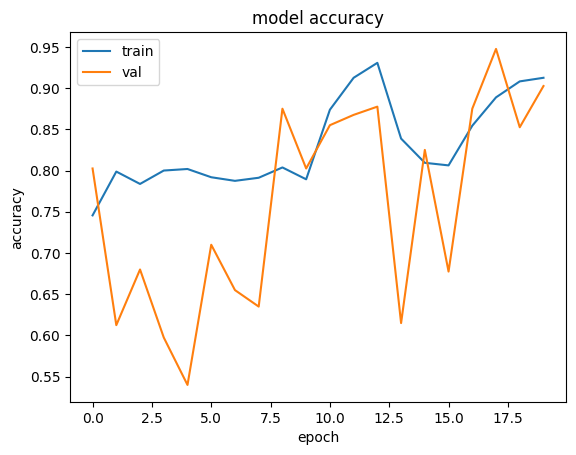

In [212]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

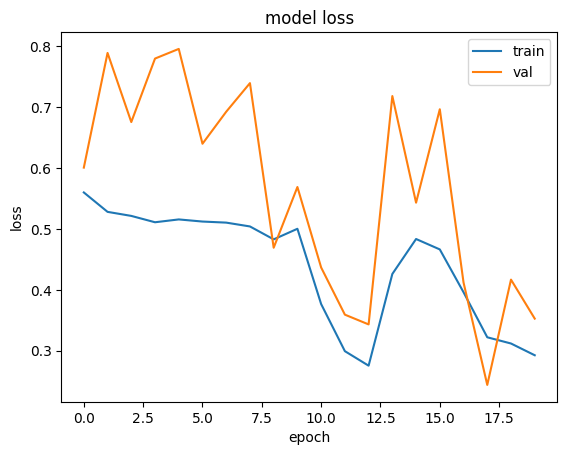

In [213]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

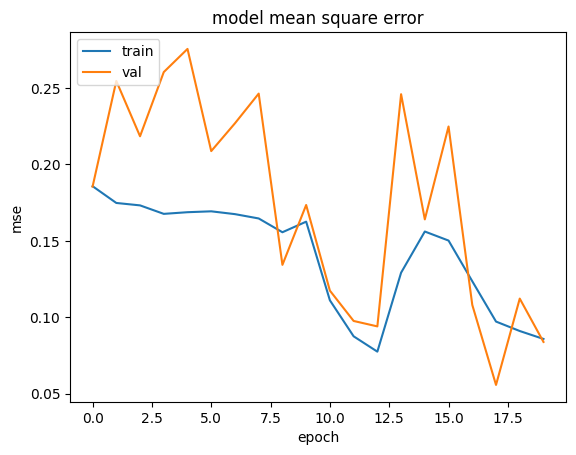

In [214]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mean square error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()